```Pythonista - Saurabh Zinjad```
# Build a Fully Connected 2 - Layer Neural Network to Classify Digits

This notebook will serve as implementation of the API that we have created in our "Code" folder.

We will be using inbuilt MNIST dataset present in PyTorch and train a neural network to classify digits. 

## Step and ToDOs

1. First of all, import the libraries and the dataset.
2. Next, show dataset samples and distribution of different type of data. For example, in case of MNIST you can show some random images and their labels. Also, show distribution of each class of images.
3. Next, perform required transformations on MNIST dataset (normalization, scaling, grayscaling if required, etc) using torchvision transforms.
4. Create required dataloaders on PyTorch MNIST dataset to load data in mini-batches.
5. Train the model, show loss and accuracy at each step of operation.
6. Plot the **loss curve for both train and validation phase**
7. Pick some manual random images from test dataset and predict their values **showing expected and actual result**.

# Our solution

 ## The project

There are four general steps that we’ll be following as we move through this project:

 ### 1. Data Preparation
 ### 2. Data visualization
 ### 3. Training and Evaluation
 ### 4. Test Set Prediction
 ### 5. showing expected and actual result


In [1]:
# Homecoming (eYRC-2018): Task 1A
# Build a Fully Connected 2-Layer Neural Network to Classify Digits
# NOTE: You can only use Tensor API of PyTorch

# Import Our Model
from nnet import model

# TODO: import torch and torchvision libraries
# We will use torchvision's transforms and datasets
import math
import torch # Version 0.4.1
import torchvision # Version 0.2.1
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# For Visualization of Data
import numpy as np
import matplotlib.pyplot as plt

# To show plots in notebook itself
%matplotlib inline

torch.set_printoptions(linewidth=20)
# set linewidth for PyTorch output that is print in console

## 1. Data Preparation
#### 1. 1 Extract The Data
#### 1. 2 Transform The Data
#### 1. 3 Load The Data

 For these purposes, PyTorch provides us with two classes:
 
 - torch.utils.data.Dataset -	An abstract class for representing a dataset.
 - torch.utils.data.DataLoader -	Wraps a dataset and provides access to the underlying data. 


### 1.1 Extract and Transform The Data
* Extract - Get the MNIST image data from the source.<br>
* Transform - Put our data into ```tensor``` form.

In [2]:
# TODO: Defining torchvision transforms for preprocessing
transform_param = transforms.Compose([transforms.ToTensor()])

# TODO: Using torchvision datasets to load MNIST
trainset = datasets.MNIST('./data', train=True, download=True, transform=transform_param) 
validset = datasets.MNIST('./data', train=True, download=True, transform=transform_param) 
testset = datasets.MNIST('./data', train=False, download=True, transform=transform_param)

In [3]:
# Spliting training set of MNIST in 90% of Train set and 10% Validation set
valid_size = 0.1
num_train = len(trainset)
num_test = len(testset)
indices = torch.LongTensor(range(num_train))
split = int(math.floor(valid_size * num_train))

# Shuffle the Indices
torch.manual_seed(42)
indices = indices[torch.randperm(num_train)]

# Split the train and valid set
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_idx)
valid_sampler = torch.utils.data.sampler.SubsetRandomSampler(valid_idx)

# NOTE: Use training batch size = 4 in train data loader.
batch_size = 4

### 1.3 Load The Data
* Put our data into an object to make it easily accessible.

In [4]:
# TODO: Use torch.utils.data.DataLoader to create loaders for train and test 
trainset_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, sampler=train_sampler)
validset_loader = torch.utils.data.DataLoader(validset, batch_size=split, sampler=valid_sampler)
testset_loader = torch.utils.data.DataLoader(testset, batch_size=num_test)

## 2. Data visualization

Let's explore the dataset, especially to determine the dimension of data.

In [5]:
print("Length of Training set : ", num_train)
print("Length of Testing set : ", num_test)

Length of Training set :  60000
Length of Testing set :  10000


In [6]:
unique_labels = trainset.train_labels.unique(sorted=True)
unique_labels_counts = trainset.train_labels.bincount()
print("unique labels in MNIST dataset : ")
print(*unique_labels.data.numpy(), end=', ')
print("\n\nCount of unique labels in MNIST dataset : ")
print(*unique_labels_counts.data.numpy(),end=', ')

unique labels in MNIST dataset : 
0 1 2 3 4 5 6 7 8 9, 

Count of unique labels in MNIST dataset : 
5923 6742 5958 6131 5842 5421 5918 6265 5851 5949, 

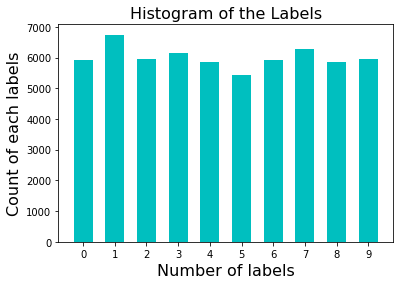

In [7]:
# Histogram of the classes
plt.bar(unique_labels, unique_labels_counts,align = 'center', width=0.6, color = 'c')
plt.xlabel('Number of labels', fontsize=16)
plt.xticks(unique_labels)
plt.ylabel('Count of each labels', fontsize=16)
plt.title('Histogram of the Labels', fontsize=16)
plt.show()

<b> access an individual element from the training set</b><br>

```iter``` - returns an object representing a stream of data.<br>
```next``` - gives next data element in the stream of data.

Shape of Image :  torch.Size([1, 28, 28]) 
Shape of Label :  torch.Size([])
Label :  tensor(5)


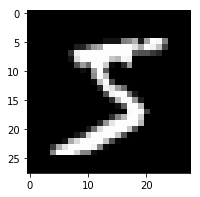

In [8]:
sample = next(iter(trainset))
# type(sample) = tuple
# Sequence Unpacking
image, label = sample
print('Shape of Image : ',image.shape, '\nShape of Label : ', label.shape)
plt.figure(figsize=(3,3))
plt.imshow(image.squeeze(),cmap='gray')
print('Label : ', label)

In [9]:
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

Shape of Images :  torch.Size([4, 1, 28, 28]) 
Shape of Labels :  torch.Size([4])


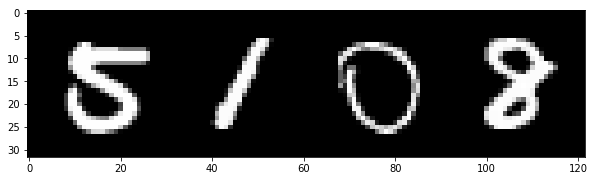

In [10]:
batch = next(iter(trainset_loader))
# type(batch) : list
images, labels = batch
print('Shape of Images : ', images.shape, '\nShape of Labels : ',labels.shape)
show_batch(images)

## 3. Training and Evaluation

1. Setup the parameters
2. Initialize the Model
3. Train and Validate the network

#### 3.1. Setup the parameters

In [11]:
# NOTE: Don't change these settings
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# NOTE: Don't change these settings
# Layer size
N_in = 28 * 28 # Input size
N_h1 = 256 # Hidden Layer 1 size
N_h2 = 256 # Hidden Layer 2 size
N_out = 10 # Output size
# Learning rate
lr = 0.01
# TODO: Define number of epochs
N_epoch = 7 # Or keep it as is

#### 3.2. Initialize the Model

In [12]:
# init model
net = model.FullyConnected(N_in, N_h1, N_h2, N_out, device=device)

#### 3.3. Train and Validate the network

In [13]:
# TODO: Training and Validation Loop
# >>> for n epochs
loss_for_epoch = []
for i in range(N_epoch):
    print("Train Epoch: ", i+1,end=' ')
# ## >>> for all mini batches
    for batch in trainset_loader:
        images = batch[0]
        images = images.reshape(images.size()[0], N_in)
        labels = batch[1]
### >>> net.train(...)
        net.train(images, labels, lr=lr, debug=False)
## at the end of each training epoch
    for batch in validset_loader:
        images = batch[0]
        images = images.reshape(images.size()[0], N_in)
        labels = batch[1]
## >>> net.eval(...)
        creloss, accuracy, outputs = net.eval(images, labels, debug= True)
        loss_for_epoch.append(creloss)

Train Epoch:  1 [ 4778.0 / 6000 ] ( 79.63 %)   Loss:  0.6805070638656616
Train Epoch:  2 [ 5277.0 / 6000 ] ( 87.95 %)   Loss:  0.41358789801597595
Train Epoch:  3 [ 5342.0 / 6000 ] ( 89.03 %)   Loss:  0.3682004511356354
Train Epoch:  4 [ 5412.0 / 6000 ] ( 90.20 %)   Loss:  0.33186665177345276
Train Epoch:  5 [ 5460.0 / 6000 ] ( 91.00 %)   Loss:  0.3017430305480957
Train Epoch:  6 [ 5506.0 / 6000 ] ( 91.77 %)   Loss:  0.2738052010536194
Train Epoch:  7 [ 5534.0 / 6000 ] ( 92.23 %)   Loss:  0.2593851089477539


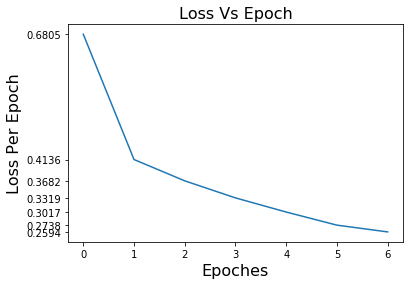

In [14]:
plt.plot(loss_for_epoch)
plt.xlabel('Epoches', fontsize=16)
plt.xticks([i for i in range(N_epoch)])
plt.ylabel('Loss Per Epoch', fontsize=16)
plt.yticks(loss_for_epoch)
plt.title('Loss Vs Epoch', fontsize=16)
plt.show()

## 4. Test Set Prediction

In [15]:
# TODO: End of Training
# make predictions on randomly selected test examples
# >>> net.predict(...)
predicted_labels = []
for i, batch in enumerate(testset_loader):
    images = batch[0]
    images = images.reshape(images.size()[0], N_in)
    labels = batch[1]
    score, idx = net.predict(images)
    predicted_labels.append(idx)
    prediction = sum((idx == labels).long()).item()
    print("=========== Traning Phase ===========")
    print("Correct Predictions :",prediction,"/",len(labels))
    print("Test Accuracy       :", prediction / len(labels) * 100, "%")

predicted_labels = predicted_labels[0]

=========== Traning Phase ===========
Correct Predictions : 9313 / 10000
Test Accuracy       : 93.13 %


### 5. showing expected and actual result

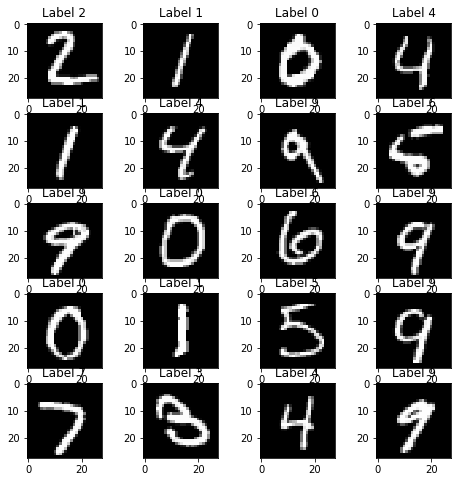

In [18]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.title('Label '+str(predicted_labels[i].item()))
    plt.imshow(testset.test_data[i].squeeze(),cmap='gray',)